<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/opencv_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import files
files.upload()

Saving everybody.jpg to everybody (1).jpg


{'everybody.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xfe\x00_Copyright Rex Shutterstock 2018;71342116;5568;3540;1525803862;Tue, 08 May 2018 18:24:22 GMT;0\xff\xed\x04jPhotoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x04N\x1c\x02\x05\x00\t9665142dr\x1c\x02\x19\x00\tEVERYBODY\x1c\x02\x19\x00\x05KNOWS\x1c\x02\x19\x00\x08PREMIERE\x1c\x02\x19\x00\x07OPENING\x1c\x02\x19\x00\x08CEREMONY\x1c\x02\x19\x00\x0471ST\x1c\x02\x19\x00\x06CANNES\x1c\x02\x19\x00\x04FILM\x1c\x02\x19\x00\x08FESTIVAL\x1c\x02\x19\x00\x06FRANCE\x1c\x02\x19\x00\x0208\x1c\x02\x19\x00\x03MAY\x1c\x02\x19\x00\x042018\x1c\x02\x19\x00\tALEXANDRE\x1c\x02\x19\x00\tMALLETGUY\x1c\x02\x19\x00\x06EDUARD\x1c\x02\x19\x00\tFERNANDEZ\x1c\x02\x19\x00\x06JAVIER\x1c\x02\x19\x00\x06BARDEM\x1c\x02\x19\x00\x06ASGHAR\x1c\x02\x19\x00\x07FARHADI\x1c\x02\x19\x00\x07THIERRY\x1c\x02\x19\x00\x07FREMAUX\x1c\x02\x19\x00\x08PENELOPE\x1c\x02\x19\x00\x04CRUZ\x1c\x02\x19\x00\x07RICARDO\x1c\x02\x19\x00\x05DARIN\x1c\x02\x19\x00\x04

In [2]:
!pip install Image

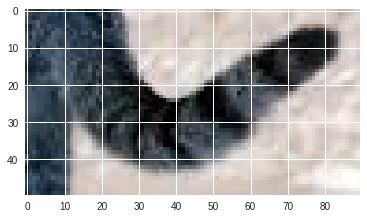

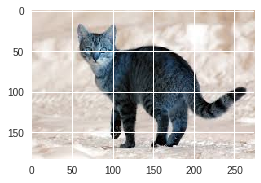

<Figure size 576x396 with 0 Axes>

In [3]:
import cv2
#import Image
import numpy as np
import os
import matplotlib.pyplot as plt

os.environ["ENABLE_CV2_IMSHOW"] = 'true'

def show_image(img):
  image = cv2.imread(img,cv2.IMREAD_COLOR)
  return image

show_image('images.jpg')
def draw(img):
  image = cv2.rectangle(img,(52,15), (270,180), 5)

def show_object(image,x,y):
  a = plt.figure(figsize=[x,y])
  plt.imshow(image)
  plt.show()


cat_tail = show_image('images.jpg')[90:140,180:270]
show_object(cat_tail,6,4)

images = show_image('images.jpg')
show_object(images,4,6)
# save image 
a = plt.savefig('duoi-meo.png')

#img [ x, y]
#img[0:90,0:50] = cat_tail

# chuyển đổi từ png sang jpg

# b = plt.figure(figsize=[6,4])
# plt.imshow(img)  # to hide tick values on X and Y axis
# plt.show()

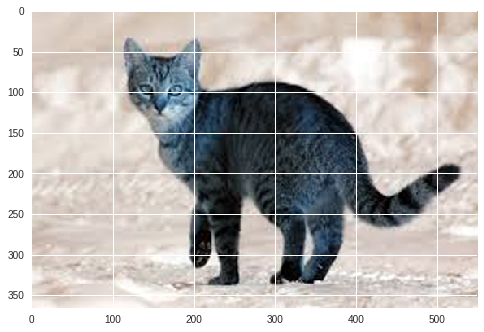

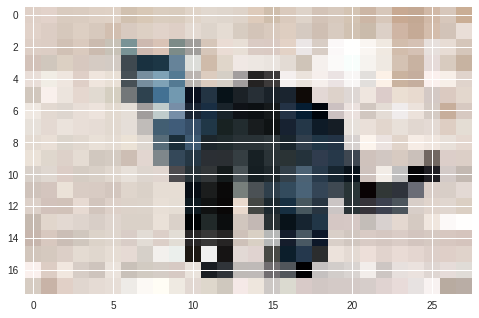

In [4]:
# expanding
res = cv2.resize(images, None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()
# skrinking
rex = cv2.resize(images, None,fx=.1, fy=.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(rex)
plt.show()

In [5]:
cat_tail.shape

(50, 90, 3)

183 , 275 , 3
theta 0 radian 0.0


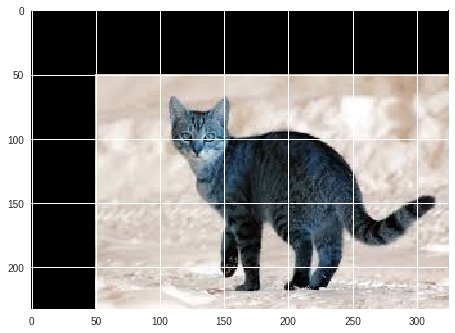

In [6]:
theta_degrees = 0
shift_x = 50
shift_y = 50

rows, cols, _ = images.shape
print(rows,",",cols,',',_)

radians = theta_degrees * np.pi / 180
print("theta" , theta_degrees ,"radian", radians)
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(images, M, (cols,rows))

plt.imshow(res)
plt.show()


***User GrabCut opencv 3.0 ***
# cv2.GrabCut() 


**img** - Input image 

**mask** - It is a mask image where we specify which areas are background, foreground or probable background/foreground etc. It is done by the following flags,

**cv**.GC_BGD, cv.GC_FGD, cv.GC_PR_BGD, cv.GC_PR_FGD, or simply pass 0,1,2,3 to image.

**rect** - It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h).

**bdgModel, fgdModel** - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).

**iterCount** - Number of iterations the algorithm should run.

**mode** - It should be cv.GC_INIT_WITH_RECT or cv.GC_INIT_WITH_MASK or combined which decides whether we are drawing rectangle or final touchup strokes 

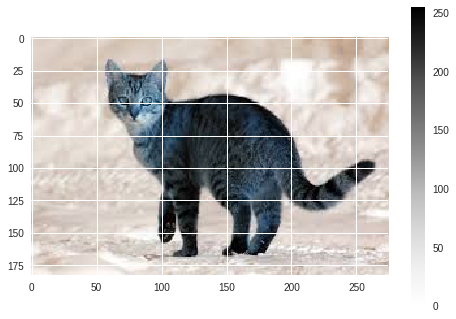

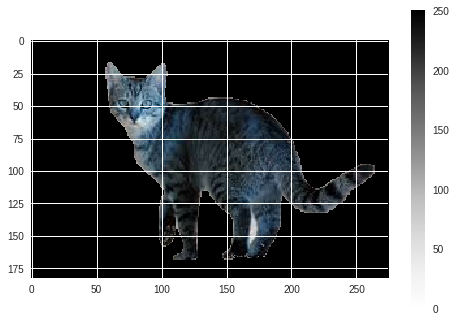

In [38]:
img = cv2.imread('images.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

backgroundModel = np.zeros((1,65),np.float64)

foregroundModel = np.zeros((1,65),np.float64)

rectangle = (15,15,450,290)
cv2.grabCut(img ,mask ,rectangle ,backgroundModel ,foregroundModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1  = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

plt.imshow(img1)
plt.colorbar()
plt.show()

***Trackbar as the Color Palette***

Goal

• Learn to bind trackbar to OpenCV windows

• You will learn these functions : cv2.getTrackbarPos(), cv2.createTrackbar() etc\

In [0]:
import cv2 
import numpy as np

def nothing(X):
  return None

img = np.zeros((300,512,3), np.uint8)
cv2.nameWindow('images')

cv2.createTrackbar()